In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"/data_all.csv", encoding="latin1")

In [ ]:
print(df.isnull().sum())


id                    0
MonsoonIntensity      0
TopographyDrainage    0
RiverManagement       0
Deforestation         0
                     ..
cnt_14                0
cnt_15                0
mmd2                  0
mac                   0
MAD                   0
Length: 75, dtype: int64


In [ ]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,cnt_9,cnt_10,cnt_11,cnt_12,cnt_13,cnt_14,cnt_15,mmd2,mac,MAD
0,0,0.039335,1.467011,0.020654,1.489348,0.508518,-0.453698,-0.458827,-0.932697,-0.938761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-0.050968,0.674861
1,1,0.525633,0.989450,-0.461971,-0.459918,1.468781,1.489614,-0.938314,0.034964,-0.455784,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,-0.076563,0.902128
2,2,0.525633,0.034328,0.503280,1.002031,-0.931878,1.003786,-1.897287,0.034964,-0.455784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,-0.076563,0.756135
3,3,-0.933262,-0.443233,0.503280,0.027398,-0.451746,1.489614,-0.458827,1.002626,0.510172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.050606,0.646598
4,4,0.039335,-0.920793,-1.427222,0.514715,-0.451746,-0.453698,-0.938314,-0.932697,-0.938761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,-0.000583,0.608820


In [ ]:
print(df.columns.tolist())  # Print column names exactly as they are


['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors', 'FloodProbability', 'type', 'ClimateAnthropogenicInteraction', 'InfrastructurePreventionInteraction', 'sum', 'std', 'mean', 'max', 'min', 'mode', 'median', 'q_25th', 'q_75th', 'skew', 'kurt', 'sum_72_76', '10th', '20th', '30th', '40th', '50th', '60th', '70th', '80th', '90th', 'harmonic', 'geometric', 'zscore', 'cv', 'Skewness_75', 'Skewness_25', '2ndMoment', '3rdMoment', 'entropy', 'rng', 'cnt_0', 'cnt_1', 'cnt_2', 'cnt_3', 'cnt_4', 'cnt_5', 'cnt_6', 'cnt_7', 'cnt_8', 'cnt_9', 'cnt_10', 'cnt_11', 'cnt_12', 'cnt_13', 'cnt_14', 'cnt_15', 'mmd2', 'mac', 'MAD']


# Target variable

In [ ]:

flood_features =[
    "MonsoonIntensity", "TopographyDrainage", "RiverManagement", "Deforestation",
    "Urbanization", "ClimateChange", "DamsQuality", "Siltation", "AgriculturalPractices",
    "Encroachments", "DrainageSystems",
    "CoastalVulnerability", "Landslides", "Watersheds",
    "PopulationScore", "WetlandLoss"
]
df_flood = df[flood_features]

In [ ]:
df_flood.shape

(5361, 16)

In [ ]:
y = df['FloodProbability']

In [ ]:
df_flood.head(6)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,PopulationScore,WetlandLoss
0,0.039335,1.467011,0.020654,1.489348,0.508518,-0.453698,-0.458827,-0.932697,-0.938761,-0.456037,0.026184,-0.936056,-0.928460,0.033750,0.999385,0.024238
1,0.525633,0.989450,-0.461971,-0.459918,1.468781,1.489614,-0.938314,0.034964,-0.455784,0.504258,0.991280,-1.414787,-2.371757,-0.926508,-0.929273,-0.943079
2,0.525633,0.034328,0.503280,1.002031,-0.931878,1.003786,-1.897287,0.034964,-0.455784,0.024110,0.991280,-0.936056,0.995936,0.033750,1.481549,-1.426738
3,-0.933262,-0.443233,0.503280,0.027398,-0.451746,1.489614,-0.458827,1.002626,0.510172,1.464552,-1.421459,-0.457324,0.995936,-0.446379,0.517220,0.024238
4,0.039335,-0.920793,-1.427222,0.514715,-0.451746,-0.453698,-0.938314,-0.932697,-0.938761,-0.936185,-1.421459,-1.414787,0.514837,0.513878,-1.893602,-1.426738
5,0.039335,-0.443233,-1.909847,-0.459918,-1.412010,-0.453698,0.500146,0.518795,0.993149,0.024110,-0.938911,0.021407,0.033738,-0.446379,0.517220,1.475215


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
target = "FloodProbability"
df.fillna(df.mean(), inplace=True)
x = df[flood_features]
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(f"Training data : {x_train.shape[0]}, test data : {x_test.shape[0]}")

Training data : 4288, test data : 1073


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### 1.Missing values
### 2.explore about numerical variables
### 3.categorical
### 4.relationship between features

In [ ]:
df_flood.isnull().sum()

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


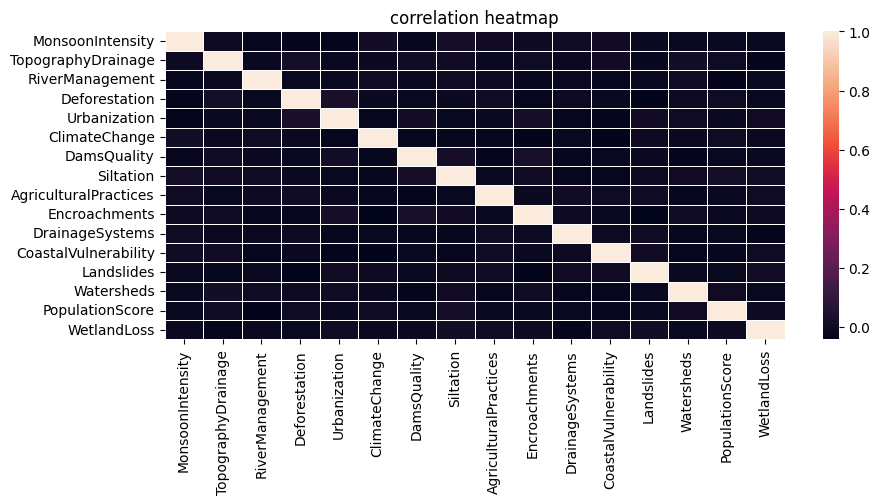

In [ ]:
corr_matrix = df_flood.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr_matrix, fmt=".2f", linewidths=0.5)
plt.title("correlation heatmap")
plt.show()

In [ ]:
df_flood.head

<bound method NDFrame.head of       MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0             0.039335            1.467011         0.020654       1.489348   
1             0.525633            0.989450        -0.461971      -0.459918   
2             0.525633            0.034328         0.503280       1.002031   
3            -0.933262           -0.443233         0.503280       0.027398   
4             0.039335           -0.920793        -1.427222       0.514715   
...                ...                 ...              ...            ...   
5356          1.011931            0.034328         0.503280      -0.947235   
5357         -1.419560           -0.443233        -0.944596      -0.459918   
5358         -0.933262            0.034328         0.503280       0.514715   
5359         -0.446964           -2.353476        -1.909847       1.489348   
5360         -0.933262            1.467011         0.985905      -0.459918   

      Urbanization  ClimateChange  DamsQuality  Siltation  \
0         0.508518      -0.453698    -0.458827  -0.932697   
1         1.468781       1.489614    -0.938314   0.034964   
2        -0.931878       1.003786    -1.897287   0.034964   
3        -0.451746       1.489614    -0.458827   1.002626   
4        -0.451746      -0.453698    -0.938314  -0.932697   
...            ...            ...          ...        ...   
5356     -0.451746       0.032130    -0.458827   0.518795   
5357      0.028386      -0.453698    -0.938314  -1.416528   
5358      0.988650      -0.453698     0.500146   0.518795   
5359     -0.451746       1.975442    -1.897287  -0.448867   
5360      0.508518       0.032130    -1.417800  -0.448867   

      AgriculturalPractices  Encroachments  DrainageSystems  \
0                 -0.938761      -0.456037         0.026184   
1                 -0.455784       0.504258         0.991280   
2                 -0.455784       0.024110         0.991280   
3                  0.510172       1.464552        -1.421459   
4                 -0.938761      -0.936185        -1.421459   
...                     ...            ...              ...   
5356               0.510172       0.024110         0.026184   
5357              -0.455784       0.504258        -1.421459   
5358               0.510172      -0.936185         1.473828   
5359               0.027194       0.984405         0.508732   
5360               2.925060       0.024110         0.508730   

      CoastalVulnerability  Landslides  Watersheds  PopulationScore  \
0                -0.936056   -0.928460    0.033750         0.999385   
1                -1.414787   -2.371757   -0.926508        -0.929273   
2                -0.936056    0.995936    0.033750         1.481549   
3                -0.457324    0.995936   -0.446379         0.517220   
4                -1.414787    0.514837    0.513878        -1.893602   
...                    ...         ...         ...              ...   
5356              0.500139    0.514837   -0.926508        -0.447108   
5357             -0.457324   -0.447361    0.513878        -0.929273   
5358              0.021407   -0.447361    1.474136        -0.929273   
5359              0.978870    1.477035    0.513878        -0.929273   
5360                   NaN         NaN         NaN              NaN   

      WetlandLoss  
0        0.024238  
1       -0.943079  
2       -1.426738  
3        0.024238  
4       -1.426738  
...           ...  
5356    -1.426738  
5357    -0.459420  
5358    -0.459420  
5359    -1.910396  
5360          NaN  

[5361 rows x 16 columns]>

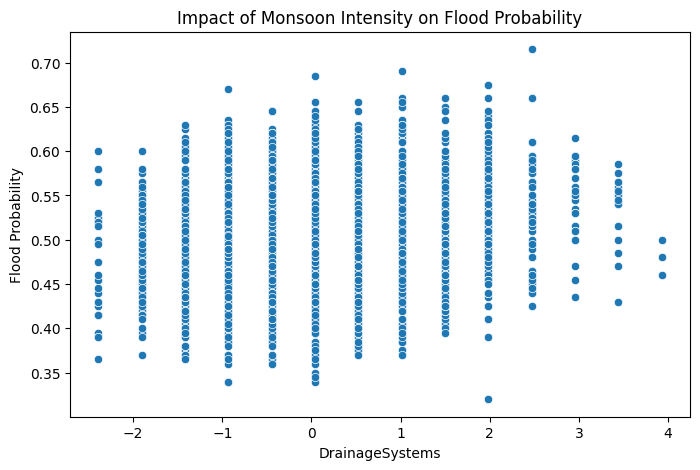

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["MonsoonIntensity"], y=df["FloodProbability"])
plt.xlabel("DrainageSystems")
plt.ylabel("Flood Probability")
plt.title("Impact of Monsoon Intensity on Flood Probability")
plt.show()


In [ ]:
df_flood.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,PopulationScore,WetlandLoss
count,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000
mean,-0.013640,-0.006025,-0.002842,0.007309,0.001697,0.013462,0.000267,-0.017200,-0.001275,-0.011715,0.011333,-0.018874,0.010491,-0.010411,-0.012621,-0.002922
std,0.990451,0.988587,1.006299,0.985256,0.997725,1.009707,1.011612,0.985144,0.979453,0.999366,0.998675,0.967661,0.996389,0.995529,1.016915,1.008067
min,-2.392157,-2.353476,-2.392472,-2.409185,-2.372274,-2.397010,-2.376773,-2.384190,-2.387694,-2.376627,-2.386555,-2.372250,-2.371757,-2.366894,-2.375766,-2.394055
25%,-0.933262,-0.920793,-0.461971,-0.459918,-0.931878,-0.453698,-0.938314,-0.932697,-0.938761,-0.936185,-0.938911,-0.936056,-0.928460,-0.926508,-0.929273,-0.459420
50%,0.039335,0.034328,0.020654,0.027398,0.028386,0.032130,0.020659,0.034964,0.027194,0.024110,0.026184,0.021407,0.033738,0.033750,0.035056,0.024238
75%,0.525633,0.511889,0.503280,0.514715,0.508518,0.517958,0.500146,0.518795,0.510172,0.504258,0.508732,0.500139,0.514837,0.513878,0.517220,0.507897
max,3.929721,4.332376,4.846908,4.900564,5.309837,4.890411,4.336038,4.389441,4.373993,4.345437,4.851663,4.808722,4.844728,3.874779,4.856700,4.377167


In [ ]:
df_flood.duplicated().sum()

0

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

x = df_flood.drop(columns=["RiverManagement", "Urbanization", "ClimateChange", "PopulationScore"])

X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,random_state=42)

model =RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print("MSE", mean_squared_error(Y_test,Y_pred))

MSE 0.0016562139136985135


## low mse => model fits well
## checking for overfitting

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test,Y_pred)
print(f'R2 score :{r2}')

R2 score :0.3781433926368831


In [ ]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(Y_train, model.predict(X_train))
test_mse = mean_squared_error(Y_test, Y_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Train MSE: 0.00023906647742180442
Test MSE: 0.0016562139136985135


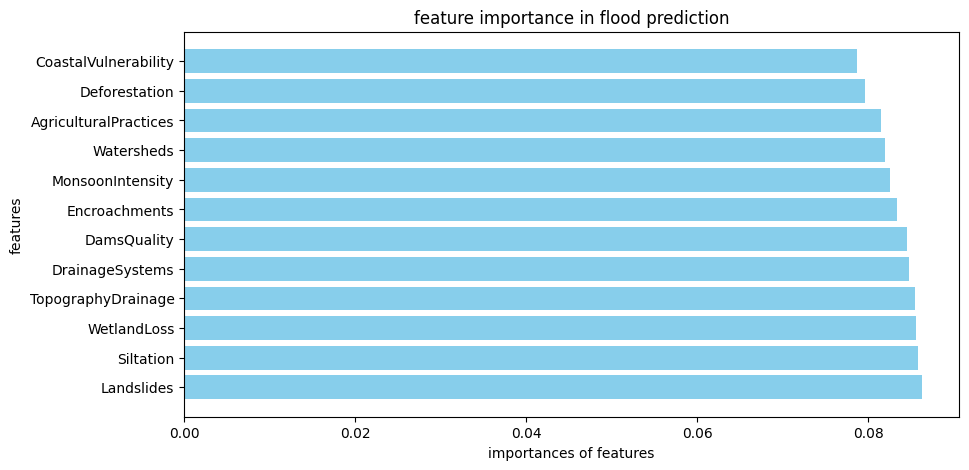

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = model.feature_importances_
features = X_train.columns

sorted_index = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10,5))
plt.barh(np.array(features)[sorted_index],feature_importance[sorted_index],color="skyblue")
plt.xlabel("importances of features")
plt.ylabel("features")
plt.title("feature importance in flood prediction")
plt.show()

## not much overfitting

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=20)),
    ('gb', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05))
]

# Stacking model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=Ridge())
stacking_model.fit(X_train, Y_train)



ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values